In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
import datetime
%matplotlib inline

In [ ]:
### BEGIN experimental cell : get general district courts stats
# print(os.getcwd())
allDist = pd.read_csv('generated/all_districts.csv')
currDist = pd.read_csv('generated/unique_dist_present.csv')
currAllDistCourts = pd.read_csv('generated/filtered_district_courts_comprehensive.csv')
allSet = set([])
currSet = set([])
counts = {}

for idx, row in allDist.iterrows():
    allSet.add(row['state_name'] + ', ' + row['district'])

for idx, row in currDist.iterrows():
    currSet.add(row['state_name'] + ', ' + row['district'])

for idx, row in currAllDistCourts.iterrows():
    key = row['state_name'] + ', ' + row['district_name']
    if key not in counts.keys():
        counts[key] = 1
    else:
        counts[key] += 1

print(allSet - currSet)

print(len(currAllDistCourts.index))
# currAllDistCourts = pd.read_csv('generated/filtered_principal_dist_courts_comprehensive.csv')
currAllDistCourts = currAllDistCourts.drop_duplicates(subset=['state_code', 'dist_code', 'court_no'])
print(len(currAllDistCourts.index))
currAllDistCourts.to_csv('generated/unique_district_courts_comprehensive.csv')
### END experimental cell

In [ ]:
### BEGIN experimental cell : filter out irrelevant cases
currAllDistCourts = pd.read_csv('generated/filtered_district_courts_comprehensive.csv')
years = [f'20{i}' for i in range(10,19)]
for year in years:
    print(f'Processing year {year}')
    cases = pd.read_csv(f'cases/_/cases_{year}.csv')
    filtered_cases = currAllDistCourts.merge(cases, how = 'inner', on = ['state_code', 'dist_code', 'court_no'])
    filtered_cases = filtered_cases[filtered_cases['type_name'].notnull()]
    filtered_cases.to_csv(f'generated/filtered_cases/cases_{year}.csv', index = False)
### END experimental cell

In [ ]:
### BEGIN experimental cell : filter out erroneous acts
acts_sections = pd.read_csv('acts_sections.csv')
acts_sections.drop(['bailable_ipc', 'number_sections_ipc', 'criminal'], axis = 1)
acts_sections = acts_sections[acts_sections['ddl_case_id'].notnull()]
acts_sections = acts_sections[acts_sections['act'].notnull()]
errActs = pd.read_csv('generated/erroneous_act_ids.csv')
for act in errActs['act']:
    print(f'removing act id {act}')
    acts_sections = acts_sections[acts_sections['act'] != act]
acts_sections.to_csv('generated/filtered_cases/acts_sections.csv', index = False)
### END experimental cell

In [ ]:
### BEGIN experimental cell : filter out cases corresponding to erroneous acts
print('Loading act_sections in memory')
acts_sections = pd.read_csv('generated/filtered_cases/acts_sections.csv')
print('Done')
years = [f'20{i}' for i in range(17,19)]
for year in years:
    print(f'Processing year {year}')
    print('Loading cases in memory')
    cases = pd.read_csv(f'generated/filtered_cases/cases_{year}.csv')
    print('Done')
    print('Filtering cases and acts')
    
    cases = cases[cases['ddl_case_id'].isin(acts_sections['ddl_case_id'])]
    cases.to_csv(f'generated/filtered_cases/cases_acts_{year}.csv', index = False)

### END experimental cell

In [2]:
# BEGIN experimental cell : generate case pendency stats for courts -->
import utils
currAllDistCourts = pd.read_csv('generated/unique_district_courts_comprehensive.csv')
temp_case_pendency_stats = utils.analyze_dist_court_wise_case_pendency_per_year(currAllDistCourts, 'generated/filtered_cases', 1, 4, 5, 'generated/dist_court_wise_pendency_rates_per_year_v2.csv')

### END experimental cell

Processing cases for year : 2010
Processing cases for year : 2011
Processing cases for year : 2012
Processing cases for year : 2013
Processing cases for year : 2014
Processing cases for year : 2015
Processing cases for year : 2016
Processing cases for year : 2017
Processing cases for year : 2018


In [4]:
### BEGIN experimental cell : get top and bottom 15 courts based on median decision days
import utils
case_stats_by_year_court = pd.read_csv(f'generated/dist_court_wise_pendency_rates_per_year_v2.csv')
filtered_dist_courts = pd.read_csv('generated/unique_district_courts_comprehensive.csv')
# inner merge case_stats_by_year_court and filtered_dist_courts on (state_code,dist_code,court_no)
case_stats_by_year_court = case_stats_by_year_court.merge(filtered_dist_courts, how = 'inner', on = ['state_code','dist_code','court_no'])

# get top and bottom 15 courts using average yearly ranks for courts
best_courts, worst_courts = utils.getBestAndWorstCourts(case_stats_by_year_court, n = 15, minInstituted = 10, minDisposed = 10, minCount = 3)
print('Best courts: ', best_courts)
print('Worst courts: ', worst_courts)


### END experimental cell

idx for 1,1,3 :  1598
[((10, 8, 9), 16.8), ((10, 9, 5), 22.8), ((3, 22, 1), 26.25), ((10, 3, 12), 30.8), ((17, 35, 1), 32.888888888888886), ((17, 36, 1), 45.666666666666664), ((3, 16, 1), 59.888888888888886), ((3, 11, 1), 65.88888888888889), ((3, 18, 1), 70.44444444444444), ((3, 28, 1), 70.88888888888889), ((6, 19, 1), 78.25), ((17, 32, 1), 81.0), ((13, 50, 3), 81.0), ((4, 2, 1), 81.22222222222223), ((3, 14, 1), 84.55555555555556)]
[((16, 8, 10), 1439.5), ((13, 76, 9), 1452.0), ((16, 6, 14), 1459.6666666666667), ((16, 19, 10), 1459.75), ((16, 25, 2), 1462.75), ((16, 24, 2), 1464.5), ((16, 24, 1), 1466.0), ((3, 25, 8), 1467.0), ((16, 6, 11), 1467.5), ((9, 39, 2), 1482.75), ((16, 22, 2), 1484.25), ((16, 14, 11), 1484.5), ((2, 15, 10), 1487.6666666666667), ((9, 40, 14), 1502.0), ((13, 76, 8), 1529.0)]
Best courts:  [(10, 8, 9), (10, 9, 5), (3, 22, 1), (10, 3, 12), (17, 35, 1), (17, 36, 1), (3, 16, 1), (3, 11, 1), (3, 18, 1), (3, 28, 1), (6, 19, 1), (17, 32, 1), (13, 50, 3), (4, 2, 1), (3,

In [6]:
### BEGIN experimental cell : add court names and save to csv file
# court_keys = pd.read_csv('keys/_/cases_court_key.csv')
# court_keys = court_keys.drop(['year'], axis = 1)
# court_keys = court_keys.drop_duplicates()
# courts_of_interest = pd.read_csv('generated/courts_of_interest_avg_rank_v2.csv')
# courts_of_interest = courts_of_interest.merge(court_keys, how = 'left', on = ['state_code', 'dist_code', 'court_no'])
# courts_of_interest.head(n=30)
# courts_of_interest.to_csv('generated/courts_of_interest_avg_rank_v2_.csv', index = False)
### END experimental cell

In [2]:
# BEGIN experimental cell : generate case pendency stats for courts 
import utils
currAllDistCourts = pd.read_csv('generated/unique_district_courts_comprehensive.csv')
dist_court_case_stats = utils.get_case_stats_for_courts(currAllDistCourts, 'generated/filtered_cases', 1, 4, 5, 'generated/dist_court_wise_pendency_rates_consolidated_v2.csv')
### END experimental cell

Processing cases for year : 2010
Processing cases for year : 2011
Processing cases for year : 2012
Processing cases for year : 2013
Processing cases for year : 2014
Processing cases for year : 2015
Processing cases for year : 2016
Processing cases for year : 2017
Processing cases for year : 2018


In [5]:
### BEGIN experimental cell : get the top and bottm k=15 courts
# dist_court_case_stats = pd.read_csv('generated/dist_court_wise_pendency_rates_consolidated_v2.csv')
# dist_court_case_stats = dist_court_case_stats.sort_values(by = 'median_decision_days', ascending = True)
# dist_court_case_stats = dist_court_case_stats[dist_court_case_stats['total_valid_cases'] >= 100]
# dist_court_case_stats.iloc[-15:,:]
court_keys = pd.read_csv('keys/_/cases_court_key.csv')
court_keys = court_keys.drop(['year'], axis = 1)
court_keys = court_keys.drop_duplicates(subset = ['state_code', 'dist_code', 'court_no'])
dist_court_case_stats = dist_court_case_stats.merge(court_keys, how = 'left', on = ['state_code', 'dist_code', 'court_no'])
dist_court_case_stats = dist_court_case_stats.sort_values(by = 'median_decision_days', ascending = True)
dist_court_case_stats.to_csv('generated/dist_court_wise_pendency_rates_consolidated_v2_.csv', index = False)

### END experimental cell

In [4]:
### BEGIN experimental cell : add court names and save to csv file
court_keys = pd.read_csv('keys/_/cases_court_key.csv')
court_keys = court_keys.drop(['year'], axis = 1)
court_keys = court_keys.drop_duplicates(subset = ['state_code', 'dist_code', 'court_no'])
courts_of_interest = pd.read_csv('generated/courts_of_interest_simple_rank_v2.csv')
courts_of_interest = courts_of_interest.merge(court_keys, how = 'left', on = ['state_code', 'dist_code', 'court_no'])
courts_of_interest.head(n=30)
courts_of_interest.to_csv('generated/courts_of_interest_simple_rank_v2_.csv', index = False)
### END experimental cell

In [2]:
### BEGIN experimental cell : generate court wise judge tenure stats for the period 2010-2018
import utils
currAllDistCourts = pd.read_csv('generated/unique_district_courts_comprehensive.csv')
utils.analyze_dist_court_wise_tenures_and_productivity(currAllDistCourts,si=1,di=4,ci=5,savefile='generated/district_court_tenure_and_judge_stats_v2.csv')
### END experimental cell

median of median tenures:  636.0
median of average daily judge strengths:  1.5701702877275396


,state_code,dist_code,court_no,total_judge_days,avg_judge_count,mean_tenure_days,median_tenure_days,num_judges,num_valid_entries
0,1.0,1.0,3.0,9900.0,3.012781,758.277778,437.0,18.0,18.0
1,1.0,2.0,1.0,17992.0,5.475350,493.574074,299.5,54.0,54.0
2,1.0,3.0,2.0,1582.0,1.000000,1582.000000,1582.0,1.0,1.0
3,1.0,4.0,1.0,35397.0,10.772063,505.104348,379.0,115.0,115.0
4,1.0,5.0,1.0,25837.0,7.862751,639.169811,545.0,53.0,53.0
...,...,...,...,...,...,...,...,...,...
1232,29.0,7.0,4.0,4067.0,1.317034,599.625000,563.0,8.0,8.0
1233,29.0,2.0,3.0,19055.0,5.798844,366.352113,86.0,71.0,71.0
1234,29.0,2.0,18.0,6703.0,2.101913,259.918919,76.0,37.0,37.0
1235,30.0,1.0,1.0,22659.0,6.895618,704.119403,732.0,67.0,67.0


In [3]:
dist_court_judge_stats = pd.read_csv('generated/district_court_tenure_and_judge_stats_v2.csv')

(array([519., 330., 150.,  77.,  44.,  21.,  19.,  13.,  10.,   6.]),
 array([0.09839953, 1.075139  , 2.05187848, 3.02861795, 4.00535743,
        4.9820969 , 5.95883638, 6.93557585, 7.91231533, 8.8890548 ,
        9.86579428]),
 <BarContainer object of 10 artists>)

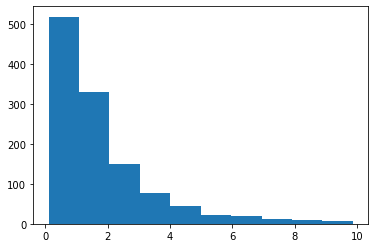

In [7]:
# plt.hist(dist_court_judge_stats[dist_court_judge_stats['avg_judge_count'] <= 10]['avg_judge_count'], bins = 10)
# dist_court_judge_stats[dist_court_judge_stats['avg_judge_count'] < 0]

In [10]:
dist_court_judge_stats = pd.read_csv('generated/district_court_tenure_and_judge_stats_v2.csv')
court_keys = pd.read_csv('keys/_/cases_court_key.csv')
court_keys = court_keys.drop(['year'], axis = 1)
court_keys = court_keys.drop_duplicates(subset = ['state_code', 'dist_code', 'court_no'])
dist_court_judge_stats = dist_court_judge_stats.merge(court_keys, how = 'left', on = ['state_code', 'dist_code', 'court_no'])
# dist_court_judge_stats = dist_court_judge_stats.sort_values(by = 'median_decision_days', ascending = True)
dist_court_judge_stats.to_csv('generated/district_court_tenure_and_judge_stats_v2_.csv', index = False)

In [2]:
import utils
currAllDistCourts = pd.read_csv('generated/unique_district_courts_comprehensive.csv')
utils.analyzeFilingToFirstListForCourts(currAllDistCourts)

Processing year 2010
Processing year 2011
Processing year 2012
Processing year 2013
Processing year 2014
Processing year 2015
Processing year 2016
Processing year 2017
Processing year 2018


In [4]:
filingListDf = pd.read_csv('generated/filingListDf_v2.csv')
courtsOfInterestSimple = pd.read_csv('generated/courts_of_interest_simple_rank_v2_.csv')

filingListDf = filingListDf.merge(courtsOfInterestSimple, how = 'inner', on = ['state_code', 'dist_code', 'court_no'])


In [6]:
filingListDf = filingListDf.sort_values(by = 'median_decision_days', ascending = True)

In [9]:
filingListDf.to_csv('generated/filingListDf_v2_.csv', index = False)

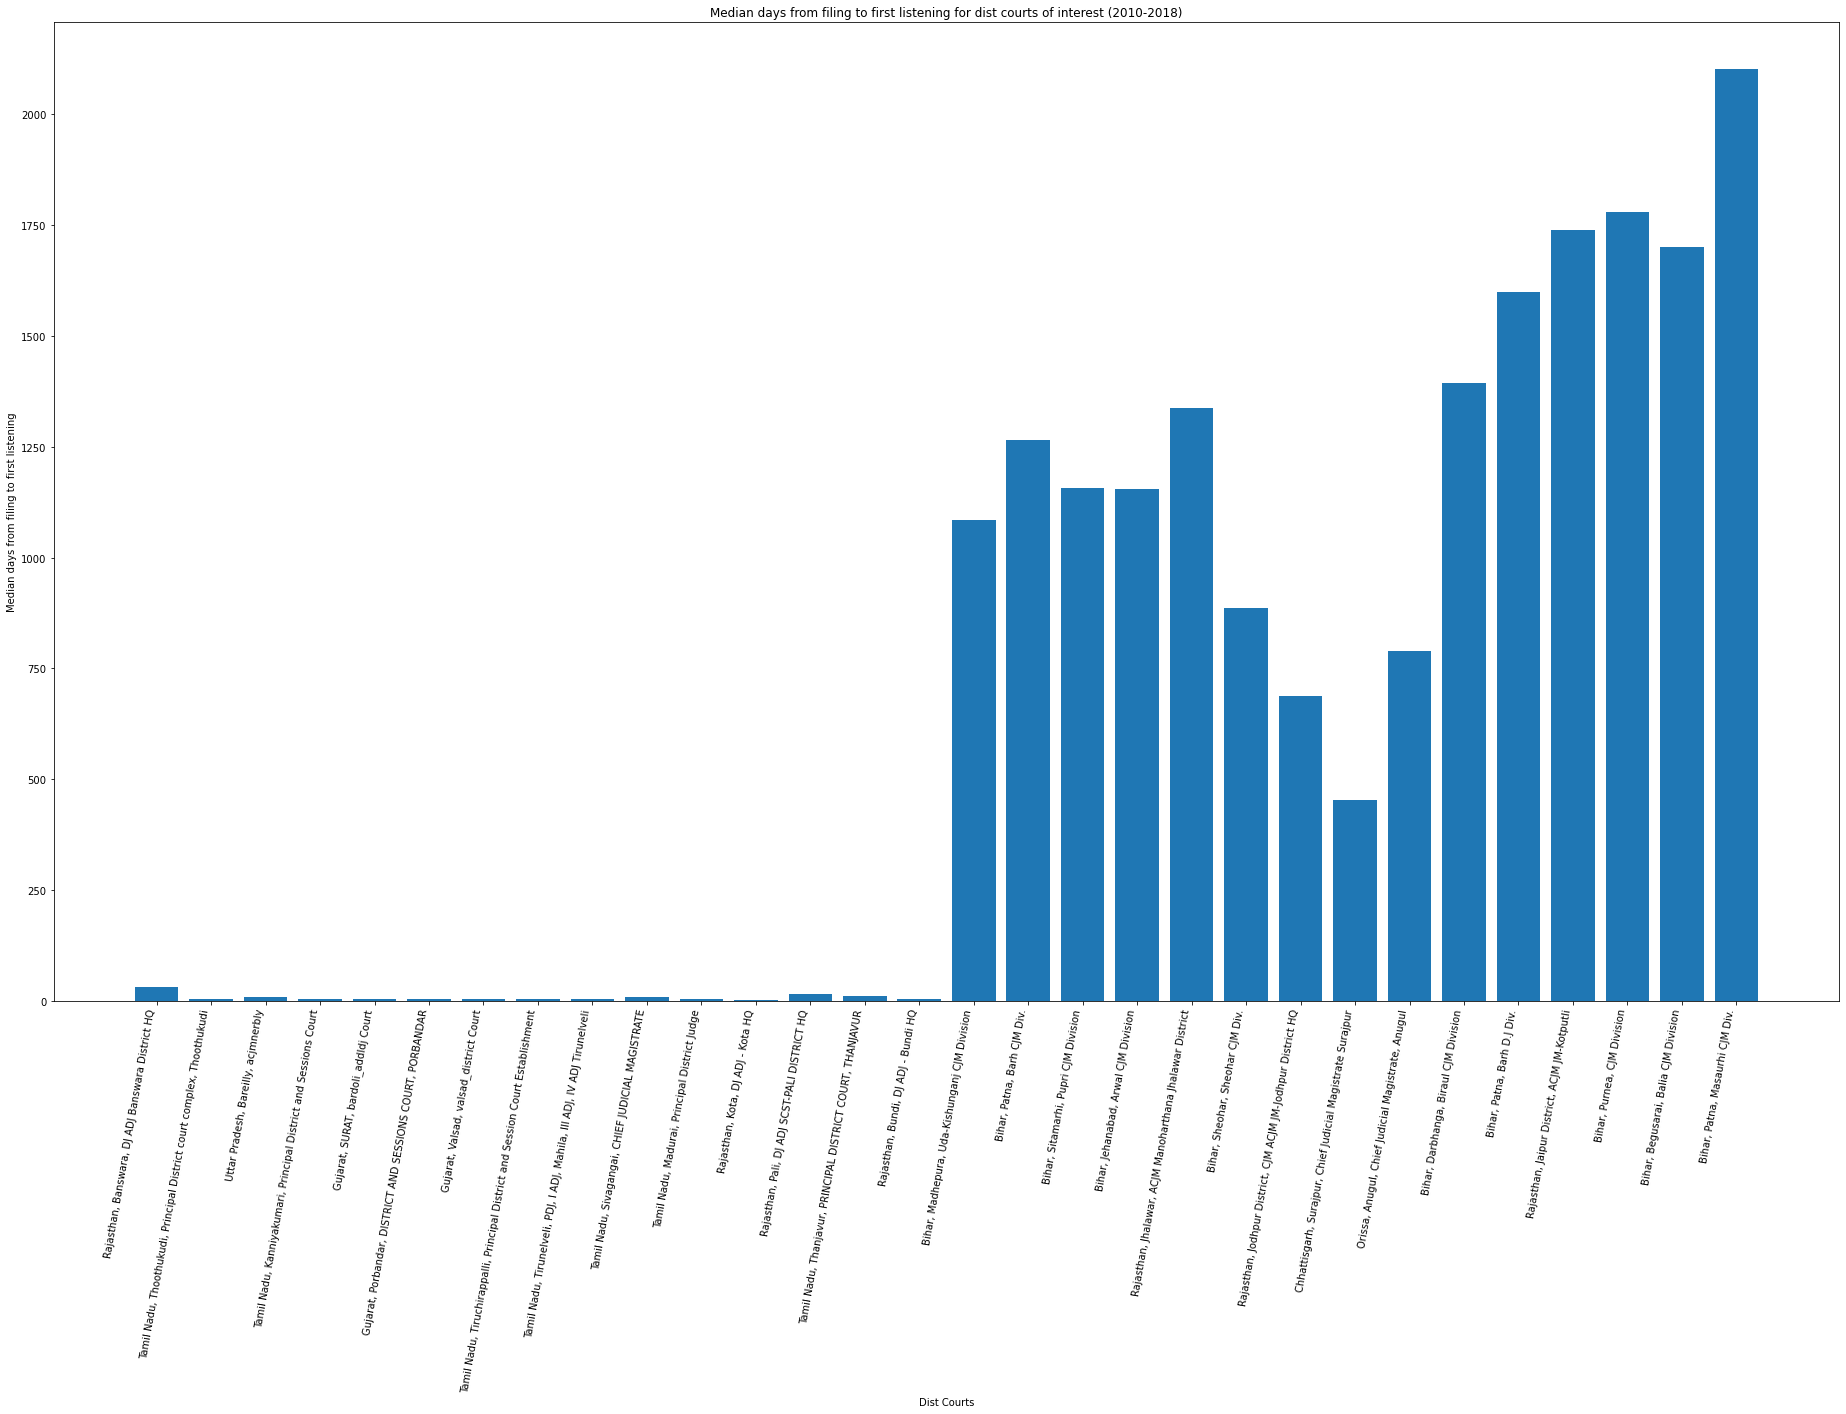

In [8]:
f = plt.figure()
f.set_figwidth(32)
f.set_figheight(18)
x_labels = [f'{s}, {d}, {c}' for s,d,c in zip(filingListDf['state_name'], filingListDf['district_name'], filingListDf['court_name'])]
heights = list(filingListDf['median_days'])
plt.bar(x = x_labels, height = heights)
plt.title('Median days from filing to first listening for dist courts of interest (2010-2018)')
plt.xticks(x_labels, rotation=80, ha='right')
plt.xlabel('Dist Courts')
plt.ylabel('Median days from filing to first listening')
f.savefig('generated/filing_to_first_listening_simple_v2.png')


In [12]:
# dist_judge_stats = pd.read_csv('generated/district_court_tenure_and_judge_stats_v2_.csv')
# courtsOfInterestSimple = pd.read_csv('generated/courts_of_interest_simple_rank_v2_.csv')

# dist_judge_stats = dist_judge_stats.merge(courtsOfInterestSimple, how = 'inner', on = ['state_code', 'dist_code', 'court_no'])
dist_judge_stats = dist_judge_stats.sort_values(by = 'median_decision_days', ascending = True)

In [14]:
dist_judge_stats.to_csv('generated/district_court_tenure_and_judge_stats_v2_simple.csv')

In [7]:
### BEGIN experimental cell : join DFs containing court wise pendency and judge stats for the duration 2010-2018
import pandas as pd
dist_judge_stats = pd.read_csv('generated/district_court_tenure_and_judge_stats_v2_.csv')
dist_court_pendency_stats = pd.read_csv('generated/dist_court_wise_pendency_rates_consolidated_v2_.csv')
merged_df = dist_judge_stats.merge(dist_court_pendency_stats, how = 'inner', on = ['state_code','dist_code','court_no'])
merged_df.to_csv('generated/dist_court_wise_pendency_and_judge_stats_consolidated.csv')

dist_court_wise_pendency_and_judge_stats_consolidated = pd.read_csv('generated/dist_court_wise_pendency_and_judge_stats_consolidated.csv')

court_of_interest_dist = pd.read_csv('generated/court_of_interest_dist.csv')
merged_df = court_of_interest_dist.merge(dist_court_wise_pendency_and_judge_stats_consolidated, how = 'inner', on = ['state_code','dist_code','court_no'])
merged_df.to_csv('generated/court_of_interest_dist_pendency_and_judge_stats_consolidated.csv')

court_of_interest_cjm = pd.read_csv('generated/court_of_interest_cjm.csv')
merged_df = court_of_interest_cjm.merge(dist_court_wise_pendency_and_judge_stats_consolidated, how = 'inner', on = ['state_code','dist_code','court_no'])
merged_df.to_csv('generated/court_of_interest_cjm_pendency_and_judge_stats_consolidated.csv')

court_of_interest_cmm = pd.read_csv('generated/court_of_interest_cmm.csv')
merged_df = court_of_interest_cmm.merge(dist_court_wise_pendency_and_judge_stats_consolidated, how = 'inner', on = ['state_code','dist_code','court_no'])
merged_df.to_csv('generated/court_of_interest_cmm_pendency_and_judge_stats_consolidated.csv')


### END experimental cell

In [ ]:
# BEGIN experimental cell : generate case age distribution stats for courts -->
import utils
import pandas as pd
currCourtsOfInterest = pd.read_csv('generated/dist_court_wise_pendency_rates_consolidated_v2_.csv')
temp_case_pendency_stats = utils.analyzeCaseAgeDistributionByCourtYear(currCourtsOfInterest, 'generated/filtered_cases', 1, 2, 3, 'generated/all_courts_of_interest_case_age_distribution_by_year.csv')

### END experimental cell

Processing cases for year : 2010
Processing cases for year : 2011
Processing cases for year : 2012
Processing cases for year : 2013
Processing cases for year : 2014
Processing cases for year : 2015
Processing cases for year : 2016
Processing cases for year : 2017


In [31]:
# BEGIN experimental cell : plot case age distribution stats for courts of interest-->

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# court_of_interest_cmm = pd.read_csv('generated/court_of_interest_cmm.csv')
# court_of_interest_cjm = pd.read_csv('generated/court_of_interest_cjm.csv')
# court_of_interest_dist = pd.read_csv('generated/court_of_interest_dist.csv')
# courts_of_interest = court_of_interest_dist.append(court_of_interest_cjm)
# courts_of_interest = courts_of_interest.append(court_of_interest_cmm)
# courts_of_interest.to_csv('generated/all_courts_of_interest.csv')

courts_of_interest = pd.read_csv('generated/all_courts_of_interest.csv')
# all_dist_courts_case_age_distribution_by_year = pd.read_csv('generated/all_dist_courts_case_age_distribution_by_year.csv')

# all_dist_courts_case_age_distribution_groups = all_dist_courts_case_age_distribution_by_year.groupby(['state_code','dist_code','court_no'])
# all_dist_courts_case_age_distribution_consolidated = all_dist_courts_case_age_distribution_groups.aggregate(np.sum)

# all_dist_courts_case_age_distribution_consolidated.to_csv('generated/all_dist_courts_case_age_distribution_consolidated.csv')
# all_dist_courts_case_age_distribution_consolidated = pd.read_csv('generated/all_dist_courts_case_age_distribution_consolidated.csv')
# dist_court_wise_pendency_rates_consolidated = pd.read_csv('generated/dist_court_wise_pendency_rates_consolidated_v2_.csv')
# dist_court_wise_pendency_rates_consolidated = dist_court_wise_pendency_rates_consolidated.drop(['total_cases','total_valid_cases','median_decision_days','mean_decision_days'], axis = 1)
# all_dist_courts_case_age_distribution_consolidated = all_dist_courts_case_age_distribution_consolidated.merge(dist_court_wise_pendency_rates_consolidated, on = ['state_code','dist_code','court_no'], how = 'inner')
# all_dist_courts_case_age_distribution_consolidated.to_csv('generated/all_dist_courts_case_age_distribution_consolidated_.csv')

# all_dist_courts_case_age_distribution_consolidated_ = pd.read_csv('generated/all_dist_courts_case_age_distribution_consolidated_.csv')

# courts_of_interest = courts_of_interest.drop(['total_cases','total_valid_cases','median_decision_days','mean_decision_days','state_name','district_name','court_name'], axis = 1)
# dist_courts_of_interest_case_age_distribution_consolidated_ = all_dist_courts_case_age_distribution_consolidated_.merge(courts_of_interest, on = ['state_code','dist_code','court_no'], how = 'inner')

x = ['0-1 year', '1-3 years', '3-5 years', '5-10 years', '10+ years']
colors = ['b', 'g', 'c', 'm', 'r']
# for idx, row in dist_courts_of_interest_case_age_distribution_consolidated_.iterrows():
#     title = row['state_name'] + ', ' + row['district_name'] + ', ' + row['court_name']
#     savefile = 'generated/case_age_distribution_plots/' + str(row['state_code']) + '_' + str(row['dist_code']) + '_' + str(row['court_no']) + '.png'
#     heights = [row['A_count'], row['B_count'], row['C_count'], row['D_count'], row['E_count']]
    
#     plt.figure(figsize=(12,8))
#     plt.bar(x, heights, color = colors)
#     plt.title(title)
#     plt.xlabel('Case duration')
#     plt.ylabel('Number of cases between 2010-2018')
#     plt.savefig(savefile)


# for idx, row in dist_courts_of_interest_case_age_distribution_consolidated_.iterrows():
#     title = row['state_name'] + ', ' + row['district_name'] + ', ' + row['court_name']
#     savefile = 'generated/case_age_distribution_plots/' + str(row['state_code']) + '_' + str(row['dist_code']) + '_' + str(row['court_no']) + '_fractions.png'
#     heights = [row['A_count'], row['B_count'], row['C_count'], row['D_count'], row['E_count']]
#     total = sum(heights)
#     heights = [h / total for h in heights]
    
#     plt.figure(figsize=(12,8))
#     plt.bar(x, heights, color = colors)
#     plt.title(title)
#     plt.xlabel('Case duration')
#     plt.ylabel('Fraction of cases between 2010-2018')
#     plt.savefig(savefile)


dist_courts_of_interest_case_age_distribution_consolidated_.to_csv('generated/dist_courts_of_interest_case_age_distribution_consolidated_.csv')
### END experimental cell